# Basics of Deep Learning

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
import random
import numpy as np
import time
from keras.datasets import mnist

Using TensorFlow backend.


<a name="realworld_dataset"></a>
# MNIST dataset

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [4]:
train_data.shape

(60000, 28, 28)

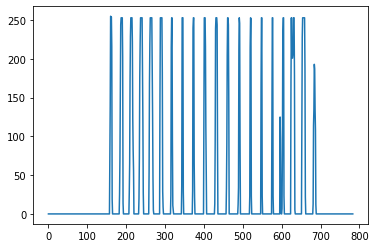

In [5]:
plt.plot(test_data[127,:].reshape(28 * 28))

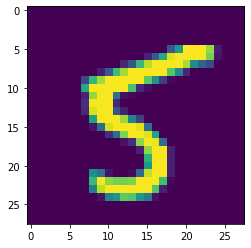

In [6]:
plt.imshow(test_data[127,:])

In [7]:
test_data[127,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  69, 141, 255, 254, 254, 216,  19,   0,
          0,   0],
       [  

In [9]:
test_data.shape

(10000, 28, 28)

In [10]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Simple classifier on MNIST

## Prepare the data

In [11]:
train_data = train_data.reshape(train_data.shape[0], 28 * 28)
test_data = test_data.reshape(test_data.shape[0], 28 * 28)

Let's first shuffle the data. 

In [12]:
import random

In [13]:
train_indexes = np.arange(len(train_data))
print(train_indexes)

[    0     1     2 ... 59997 59998 59999]


In [14]:
random.shuffle(train_indexes)
print(train_indexes)

[49449 44076 46096 ... 25807 19200 39593]


Shuffled the training dataset.

In [15]:
train_X = train_data[train_indexes]
train_Y = train_labels[train_indexes]

We do the same for the test set

In [16]:
test_indexes = np.arange(len(test_data))
random.shuffle(test_indexes)

For simplicity, we use 1000 samples:

In [17]:
test_indexes = test_indexes[:1000]

In [18]:
test_X = test_data[test_indexes]
test_Y = test_labels[test_indexes]

In [20]:
print(train_X.shape)

(60000, 784)


In [19]:
print(test_X.shape)

(1000, 784)


In [ ]:
np.unique(test_Y)

## Train a kNN

Let's get a classifier of our choice (e.g. kNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
clf = KNeighborsClassifier()

In [23]:
start_time = time.time()

clf.fit(train_X, train_Y)

print('Elapsed time:', time.time() - start_time, 'seconds')

Elapsed time: 18.427083015441895 seconds


In [24]:
start_time = time.time()
accuracy = clf.score(test_X, test_Y)
print('accuracy: {:.3f} in {:.1f}s'.format(accuracy, time.time() - start_time))

accuracy: 0.975 in 67.7s


## Confusion matrix

In [25]:
y_pred = clf.predict(test_X)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
mat = confusion_matrix(test_Y, y_pred)

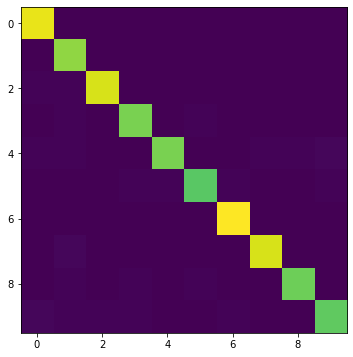

In [28]:
plt.figure(figsize=(6,6))
plt.imshow(mat)

# Deep Neural Network

We will be using Keras, a python deep learning library, with a high-level API that makes it easy to test things in deep learning. 

Check the website: https://keras.io/ 

In [29]:
import keras

## Prepare data

First, prepare the data for deep learning. Normalise data: 

In [30]:
train_X = train_data[train_indexes] / 255.0
test_X = test_data[test_indexes] / 255.0

In [31]:
train_Y = train_labels[train_indexes]
test_Y = test_labels[test_indexes]

In [32]:
print(train_X.shape, test_X.shape)

(60000, 784) (1000, 784)


Define a set of validation data, for instance, taking a random split of 10% of the training set. Since we have already randomized the trainin set, we can just keep the first 90% for the train set, and leave the last 10% for the validation set.

In [33]:
train_X = train_data[train_indexes][:int(0.9 * len(train_data[train_indexes]))]
train_Y = train_labels[train_indexes][:int(0.9 * len(train_labels[train_indexes]))]

In [34]:
print(train_X.shape)

(54000, 784)


In [35]:
valid_X = train_data[train_indexes][int(0.9 * len(train_data[train_indexes])):len(train_data[train_indexes])]
valid_Y = train_labels[train_indexes][int(0.9 * len(train_labels[train_indexes])):len(train_labels[train_indexes])]

In [36]:
print(valid_X.shape)

(6000, 784)


Labels need to be vectorized such that label `3` out of `10` classes means a vector of size  `10` filled with `0` except at cell `3`, set to `1`. 

In [37]:
train_Y = keras.utils.to_categorical(train_Y, 10)
valid_Y = keras.utils.to_categorical(valid_Y, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)

In [38]:
print(train_Y.shape)

(54000, 10)


In [39]:
train_labels[train_indexes][1231]

1

In [40]:
train_Y[1231,:]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [41]:
num_classes = train_Y.shape[1]

## Build your first neural network

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

![dnn1](./assets/dnn1.png)

In [52]:
model = Sequential()

We have to specify the `input_shape`, which the dimension of the input observations, here `784`:

In [44]:
input_shape = train_X.shape[1:]

In [53]:
model.add(Dense(num_classes, activation='softmax', input_shape=input_shape))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [48]:
model.fit(train_X, train_Y,
          batch_size=64,
          epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
54000/54000 [==============================] - 1s 21us/step - loss: 7.4328 - acc: 0.5310


In [49]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test accuracy: {:.3f}'.format(score[1]))

Test loss: 1.710
Test accuracy: 0.660


What can we do to improve?

In [56]:
model.fit(train_X, train_Y,
          batch_size=64,
          epochs=20)

Epoch 1/20
54000/54000 [==============================] - 1s 20us/step - loss: 13.4703 - acc: 0.1630
Epoch 2/20
54000/54000 [==============================] - 1s 17us/step - loss: 11.8694 - acc: 0.2603
Epoch 3/20
54000/54000 [==============================] - 1s 19us/step - loss: 8.8995 - acc: 0.4441
Epoch 4/20
54000/54000 [==============================] - 1s 20us/step - loss: 8.7243 - acc: 0.4562
Epoch 5/20
54000/54000 [==============================] - 1s 19us/step - loss: 8.2412 - acc: 0.4853: 0s - loss: 8.2777 - acc: 0.483
Epoch 6/20
54000/54000 [==============================] - 1s 19us/step - loss: 6.9896 - acc: 0.5616
Epoch 7/20
54000/54000 [==============================] - 1s 19us/step - loss: 6.0710 - acc: 0.6189
Epoch 8/20
54000/54000 [==============================] - 1s 19us/step - loss: 5.9393 - acc: 0.6273
Epoch 9/20
54000/54000 [==============================] - 1s 18us/step - loss: 5.8597 - acc: 0.6325
Epoch 10/20
54000/54000 [==============================] - 1s 16us

In [57]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test accuracy: {:.3f}'.format(score[1]))

Test loss: 1.499
Test accuracy: 0.665


How can we see if the network is learning something? 

### History

In [58]:
model = Sequential()
model.add(Dense(num_classes, 
                activation='softmax', 
                input_shape=input_shape))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [59]:
history = model.fit(train_X, train_Y,
          batch_size=64,
          epochs=20,
          verbose=1)

Epoch 1/20
54000/54000 [==============================] - 1s 21us/step - loss: 8.3618 - acc: 0.4748
Epoch 2/20
54000/54000 [==============================] - 1s 19us/step - loss: 7.0843 - acc: 0.5572
Epoch 3/20
54000/54000 [==============================] - 1s 18us/step - loss: 6.9702 - acc: 0.5646
Epoch 4/20
54000/54000 [==============================] - 1s 21us/step - loss: 6.9246 - acc: 0.5681
Epoch 5/20
54000/54000 [==============================] - 1s 20us/step - loss: 6.9128 - acc: 0.5690: 0s - loss: 6.886
Epoch 6/20
54000/54000 [==============================] - 1s 19us/step - loss: 6.8879 - acc: 0.5706
Epoch 7/20
54000/54000 [==============================] - 1s 20us/step - loss: 6.8744 - acc: 0.5714
Epoch 8/20
54000/54000 [==============================] - 1s 20us/step - loss: 6.8560 - acc: 0.5728
Epoch 9/20
54000/54000 [==============================] - 1s 19us/step - loss: 6.8455 - acc: 0.5734
Epoch 10/20
54000/54000 [==============================] - 1s 19us/step - loss: 6.

In [60]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test accuracy: {:.3f}'.format(score[1]))

Test loss: 1.891
Test accuracy: 0.587


In [ ]:
history.history

In [61]:
hist = history.history

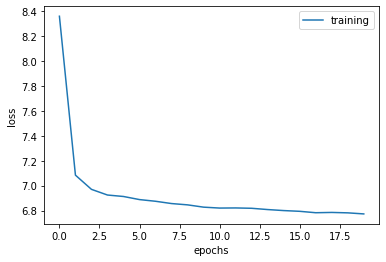

In [62]:
plt.plot(hist['loss'], label='training')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Validation set

In [63]:
model = Sequential()
model.add(Dense(num_classes, 
                activation='softmax', 
                input_shape=input_shape))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [64]:
history = model.fit(train_X, 
                    train_Y,
                    batch_size=64,
                    epochs=20,
                    verbose=1,
                    validation_data=(valid_X, valid_Y))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s 23us/step - loss: 9.6303 - acc: 0.3968 - val_loss: 8.1092 - val_acc: 0.4900
Epoch 2/20
54000/54000 [==============================] - 1s 17us/step - loss: 7.5266 - acc: 0.5280 - val_loss: 7.3433 - val_acc: 0.5395
Epoch 3/20
54000/54000 [==============================] - 1s 17us/step - loss: 7.2783 - acc: 0.5446 - val_loss: 7.2426 - val_acc: 0.5467
Epoch 4/20
54000/54000 [==============================] - 1s 19us/step - loss: 7.1981 - acc: 0.5501 - val_loss: 7.1400 - val_acc: 0.5543
Epoch 5/20
54000/54000 [==============================] - 1s 17us/step - loss: 7.1500 - acc: 0.5533 - val_loss: 7.1625 - val_acc: 0.5530
Epoch 6/20
54000/54000 [==============================] - 1s 19us/step - loss: 7.0434 - acc: 0.5597 - val_loss: 6.2318 - val_acc: 0.6078
Epoch 7/20
54000/54000 [==============================] - 1s 18us/step - loss: 5.7907 - acc: 0.6366 - val_loss: 5.7689 - val_acc:

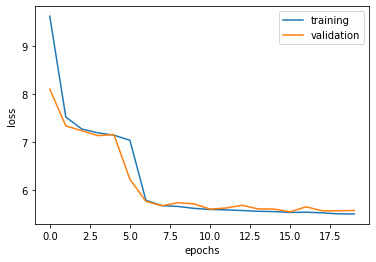

In [65]:
hist = history.history
plt.plot(hist['loss'], label='training')
plt.plot(hist['val_loss'], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Used to spot overfitting

## Adding a layer

![dnn1](./assets/dnn2.png)

In [66]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=input_shape))

model.add(Dense(num_classes, activation='softmax'))

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [72]:
log = model.fit(train_X, train_Y,
                batch_size=64,
                epochs=30,
                verbose=1,
                validation_data=(valid_X, valid_Y))

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 55us/step - loss: 6.6160 - acc: 0.5888 - val_loss: 6.6588 - val_acc: 0.5857
Epoch 2/30
54000/54000 [==============================] - 3s 53us/step - loss: 6.6031 - acc: 0.5894 - val_loss: 6.5982 - val_acc: 0.5902
Epoch 3/30
54000/54000 [==============================] - 3s 51us/step - loss: 6.5834 - acc: 0.5907 - val_loss: 6.8670 - val_acc: 0.5722
Epoch 4/30
54000/54000 [==============================] - 3s 52us/step - loss: 6.5839 - acc: 0.5905 - val_loss: 6.6156 - val_acc: 0.5885
Epoch 5/30
54000/54000 [==============================] - 3s 52us/step - loss: 6.5504 - acc: 0.5928 - val_loss: 6.6173 - val_acc: 0.5887
Epoch 6/30
54000/54000 [==============================] - 3s 52us/step - loss: 6.5745 - acc: 0.5913 - val_loss: 6.6456 - val_acc: 0.5867
Epoch 7/30
54000/54000 [==============================] - 3s 51us/step - loss: 6.5592 - acc: 0.5923 - val_loss: 6.6287 - val_acc:

In [73]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test accuracy: {:.3f}'.format(score[1]))

Test loss: 1.055
Test accuracy: 0.764


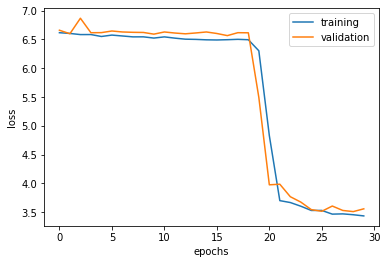

In [74]:
hist = log.history
plt.plot(hist['loss'], label='training')
plt.plot(hist['val_loss'], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

We can always the confusion matrix:

In [ ]:
y_pred = model.predict(test_X)

In [ ]:
mat = confusion_matrix(np.argmax(test_Y, axis=1), np.argmax(y_pred, axis=1))

In [ ]:
plt.imshow(mat)

## Adding other layers

In [75]:
model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total para

In [77]:
log = model.fit(train_X, train_Y,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(valid_X, valid_Y))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 19s 353us/step - loss: 14.5257 - acc: 0.0987 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 2/10
54000/54000 [==============================] - 19s 345us/step - loss: 14.5272 - acc: 0.0987 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 3/10
54000/54000 [==============================] - 18s 342us/step - loss: 14.5272 - acc: 0.0987 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 4/10
54000/54000 [==============================] - 18s 339us/step - loss: 14.5272 - acc: 0.0987 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 5/10
54000/54000 [==============================] - 19s 345us/step - loss: 14.5272 - acc: 0.0987 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 6/10
54000/54000 [==============================] - 20s 369us/step - loss: 14.5272 - acc: 0.0987 - val_loss: 14.5251 - val_acc: 0.0988
Epoch 7/10
22592/54000 [===========>..................] - ETA: 11s - loss: 14.5535 - acc: 0.0971

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test accuracy: {:.3f}'.format(score[1]))

# Convolutional Neural Network

In [78]:
from keras.layers import Conv2D

### Change dimensions to "images"

In [79]:
train_split = int(0.9 * len(train_data[train_indexes]))

In [80]:
train_X = train_data[train_indexes][:train_split] / 255.0
train_Y = train_labels[train_indexes][:train_split]

valid_X = train_data[train_indexes][train_split:] / 255.0
valid_Y = train_labels[train_indexes][train_split:]

test_X = test_data[test_indexes] / 255.0
test_Y = test_labels[test_indexes]

In [81]:
print(train_X.shape, valid_X.shape, test_X.shape)

(54000, 784) (6000, 784) (1000, 784)


In [82]:
train_X = train_X.reshape(54000, 28, 28, 1)
valid_X = valid_X.reshape(6000, 28, 28, 1)
test_X = test_X.reshape(1000, 28, 28, 1)

In [83]:
print(train_X.shape, valid_X.shape, test_X.shape)

(54000, 28, 28, 1) (6000, 28, 28, 1) (1000, 28, 28, 1)


In [84]:
train_Y = keras.utils.to_categorical(train_Y, 10)
valid_Y = keras.utils.to_categorical(valid_Y, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)

In [85]:
print(train_Y.shape, valid_Y.shape, test_Y.shape)

(54000, 10) (6000, 10) (1000, 10)


In [86]:
input_shape = train_X.shape[1:]

### Define ConvNet

One layer conv:

In [87]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [88]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                216330    
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________
None


In [89]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [90]:
log = model.fit(train_X, train_Y,
                batch_size=64,
                epochs=10,
                verbose=1,
                validation_data=(valid_X, valid_Y))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 13s 234us/step - loss: 0.2373 - acc: 0.9310 - val_loss: 0.1099 - val_acc: 0.9668
Epoch 2/10
54000/54000 [==============================] - 12s 227us/step - loss: 0.0861 - acc: 0.9758 - val_loss: 0.0844 - val_acc: 0.9750
Epoch 3/10
54000/54000 [==============================] - 12s 230us/step - loss: 0.0641 - acc: 0.9811 - val_loss: 0.0718 - val_acc: 0.9795
Epoch 4/10
54000/54000 [==============================] - 12s 229us/step - loss: 0.0530 - acc: 0.9851 - val_loss: 0.0700 - val_acc: 0.9797
Epoch 5/10
54000/54000 [==============================] - 13s 238us/step - loss: 0.0458 - acc: 0.9866 - val_loss: 0.0738 - val_acc: 0.9773
Epoch 6/10
54000/54000 [==============================] - 12s 226us/step - loss: 0.0407 - acc: 0.9886 - val_loss: 0.0658 - val_acc: 0.9805
Epoch 7/10
54000/54000 [==============================] - 13s 237us/step - loss: 0.0361 - acc: 0.9902 - val_loss: 0.0

In [ ]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
hist = log.history
plt.plot(hist['loss'], label='training')
plt.plot(hist['val_loss'], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
log = model.fit(train_X, train_Y,
                batch_size=64,
                epochs=5,
                verbose=1,
                validation_data=(valid_X, valid_Y))

In [ ]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
hist = log.history
plt.plot(hist['loss'], label='training')
plt.plot(hist['val_loss'], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Generative Model

GAN: Generative Adversarial Network

https://github.com/eriklindernoren/Keras-GAN

In [ ]:
# from gan import GAN

In [ ]:
# mod = GAN()

In [ ]:
# mod.train(epochs=1000, batch_size=32, sample_interval=10)

___
About this material: copyright Baptiste Caramiaux (write me for any questions or use of this material [email](mailto:baptiste.caramiaux@lri.fr))
___